## APS2 - Transferência de Calor e Mecânica dos Sólidos

#### OBJETIVO GERAL
Desenvolver uma função, usando o Python, para avaliar o comportamento da temperatura de um dissipador de calor (aleta) aplicando técnicas numéricas de simulação. 

OBS:
A função deve receber:
- Dados do material: densidade do material, calor específico, condutividade térmica.
- Dados do ambiente: coeficiente de transferência por convecção, temperatura do fluido.
- Dados do dissipador: temperatura da base, raio, comprimento.
- Dados do modelo numérico: Δ𝑥, tempo total da simulação.
- A função deve retornar: Um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) com o resultado numérico. Um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) com o resultado analítico. Use legendas e indique as unidades usadas. 

In [1]:
from math import *
import numpy as np 
from  matplotlib import pyplot as plt

### Descrição do problema

Considere uma aleta de seção transversal circular e constante, com temperatura fixa na base e exposta ao ambiente em
todas as outras superfícies. Podemos esboçar as entradas e saídas de energia em um volume de controle definido ao
redor de uma seção como indica a Fig.1. 

<img src="./img1.png"  width=50% alt="problema"> </img>

1. Aplique os conceitos do método das diferenças finitas na equação diferencial do problema para definir uma equação de diferença algébrica associada aos nós da aleta. Considere para a segunda derivada da temperatura no espaço uma equação de diferença finita centrada e para a primeira derivada no tempo da temperatura uma equação de diferença progressiva. Apresente o desenvolvimento das equações.

#### Do enunciado, temos a forma geral da equação da energia para uma superfície estendida, em regime transistente (1):
$$\frac { d ^ { 2 } T } { d x ^ { 2 } } - \frac { h P } { k A _ { t r } } ( T - T _ { \infty } ) = \frac { 1 } { \alpha } \cdot \frac { d T } { d t }$$

#### Para a segunda derivada da temperatura no espaço, temos a equação de diferença finita centrada (2):
$$\frac { \partial ^ { 2 } T } { \partial x ^ { 2 } } = \frac { T _ { i + 1, j} - 2 T _ { i, j } + T _ { i - 1, j }  } { \Delta x ^ { 2 } }$$

#### Para a primeira derivada da temperatura no espaço, temos a equação de diferença progressiva (3):
$$\frac { \partial T } { \partial t } = \frac { T _ { i } ^ { l + 1 } - T _ { i } ^ { l } } { \Delta t }$$

#### Substituindo (2) e (3) em (1), temos: 
$$\frac { T _ { i + 1 } - 2 T _ { i } + T _ { i - 1 } } {  \Delta x ^ { 2 } } - \frac { h P } { k A _ { tr } } ( T - T _ { \infty } ) = \frac { 1 } { \alpha } \cdot \frac { T _ { i } ^ { l + 1 } - T _ { i } ^ { l } } { \Delta t }$$

#### Resolvendo Analíticamente 
$$\frac { T _ { i + 1 } - 2 T _ { i } + T _ { i - 1 } } {  \Delta x ^ { 2 } } - \frac { h P } { k A _ { tr } } ( T - T _ { \infty } ) = \frac { 1 } { \alpha } \cdot \frac { T _ { i } ^ { l + 1 } - T _ { i } ^ { l } } { \Delta t }$$

$$T _ { i } ^ { l + 1 } - T _ { i } ^ { l } = ( \frac { T _ { i + 1 } - 2 T _ { i } + T _ { i - 1 } } { \Delta x ^ { 2 } } - \frac { h P } { k A _ { tr } } ( T - T _ { \infty } ) ) \cdot ( \alpha \cdot \Delta t )$$

$$T _ { i } ^ { l + 1 } = ( \frac { T _ { i + 1 }  - 2 T _ { i } + T _ { i-1 } } { \Delta x ^ { 2 } } - \frac { h P } { k A _ { tr } } ( T - T _ { \infty } ) ) \cdot ( \alpha \cdot \Delta t ) + T _ { i } ^ { l }$$

#### Concluindo
$$T _ { i } ^ { l + 1 } = \frac { \alpha \cdot \Delta t } { \Delta x ^ { 2 } } ( T _ { i + 1 } - 2 T _ { i } + T _ { i - 1 } ) - \frac { \alpha \cdot \Delta t \cdot h P } { k A _ { t r } } ( T - T _ { \infty } ) + T _ { i } ^ { l }$$

2. Apresente um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) após obter o regime permanente. Use uma tolerância de 𝑡𝑜𝑙 = 1e-10. Considere que a aleta, de comprimento 𝐿 = 300𝑚𝑚 , densidade de 2700 𝑘𝑔/𝑚³ , condutividade térmica de 180 𝑊/(𝑚𝐾) e calor específico 896𝐽/(𝑘𝑔𝐾), tem a temperatura especificada na extremidade de 𝑇(𝐿) = 25℃. A aleta está em contato com uma base a 𝑇b = 100℃ em um ambiente a 𝑇8 = 50℃ e ℎ = 50𝑊/𝑚2𝐾. Para a condição de estabilidade do procedimento numérico use: $$ \Delta t \leq \frac { \Delta x ^ { 2 } } { \alpha \cdot ( \frac { h p \Delta x ^ { 2 } } { k A _ {t r} } + 2 ) } $$

In [16]:
#𝑡𝑜𝑙 = 1e-10 # Tolerância 
# l = Comprimento da aleta
# d = Densidade
# k = Condutividade térmica
# ce = Calor específico
# Tb = Temperatura da base
# Ta = Temperatura Ambiente 
# Tf = temperatuda do fluido
# T_ext = Temperatura na extremidade
# h = Coeficiente de transferência
# delta_x
# t_total = Tempo total

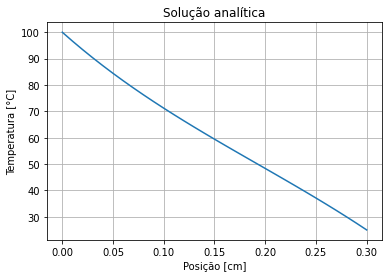

In [21]:
def temp_aleta(d, ce, k, h, Tf, Tb, r, l, delta_x, t_total): 
    #retorna um gráfico
    p = 2*pi*r #perimetro
    Atr = pi*(r**2)
    C = (h*p)/(k*Atr)
    alfa = k/(d*ce)
    delta_t = ((delta_x**2) / (alfa*(C*(delta_x**2) + 2)))*0.99
    cte = alfa*delta_t
    passos = int(t_total / delta_t)
    n_nos = int(l/delta_x) + 1
    tol = 1e-10

    #Aqui inicializamos a matriz com zeros
    T = np.zeros((passos, n_nos))

    #Condições de Contorno
    T[:, n_nos - 1]= 25
    T[:, 0] = Tb

    error = 0
    instance = 0
    
    for x in range(0, passos - 1):
        list = []
        for i in range(1, n_nos - 1):
            T[x+1, i] = T[x, i] + (cte/(delta_x**2))*(T[x, i+1]-2*T[x,i] + T[x, i-1] - (cte*C*(T[x,i] - Tf)))

            erro = (T[x+1,i] - T[x,i])/T[x+1, i]
            list.append(erro)

        if (max(list) < tol):
            error = max(list)
            instance = x
            break     
    if (instance > 0):
        T = np.array(T[instance, :])
    else:
        T = np.array(T[passos-1, :])

    x = np.linspace(0, l, n_nos)
    plt.title("Solução analítica")
    plt.plot(x, T)
    plt.xlabel("Posição [cm]")
    plt.ylabel("Temperatura [°C]")
    plt.grid()
    plt.show()
    return

#Chamamos a função e passamos os parâmetros que nos foi passado no
temp_aleta(2700, 896, 180, 50, 50, 100, 10/1000, 300/1000, 1e-2, 1000)

3. Para validar os resultados obtidos com o software desenvolvido, apresente um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) para o comportamento analítico da temperatura na aleta usando as mesmas condições definidas no item anterior. 